In [3]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('C:/Users/jiax2/Teams/Playground/Asurion_data_iPhone_v3.csv', parse_dates=['weeks_monday','month_year'])

In [7]:
iphone12_df = df[df['phone_generation'] == 'iphone 12']
iphone12_df = iphone12_df.groupby(['weeks_monday'])['claim'].sum().reset_index()
iphone12_df = iphone12_df.sort_values(by='weeks_monday')
iphone12_df.set_index('weeks_monday', inplace=True)
iphone12_df

,claim
weeks_monday,
2021-06-28,422
2021-07-05,1017
2021-07-12,1045
2021-07-19,1144
2021-07-26,1157
...,...
2023-01-16,4277
2023-01-23,4136
2023-01-30,3764


In [8]:
## first and last week abnormally low so drop
iphone12_df = iphone12_df.drop(iphone12_df.index[-1])
iphone12_df = iphone12_df.drop(iphone12_df.index[0])
iphone12_df 

,claim
weeks_monday,
2021-07-05,1017
2021-07-12,1045
2021-07-19,1144
2021-07-26,1157
2021-08-02,1212
...,...
2023-01-09,3959
2023-01-16,4277
2023-01-23,4136


<AxesSubplot:xlabel='weeks_monday'>

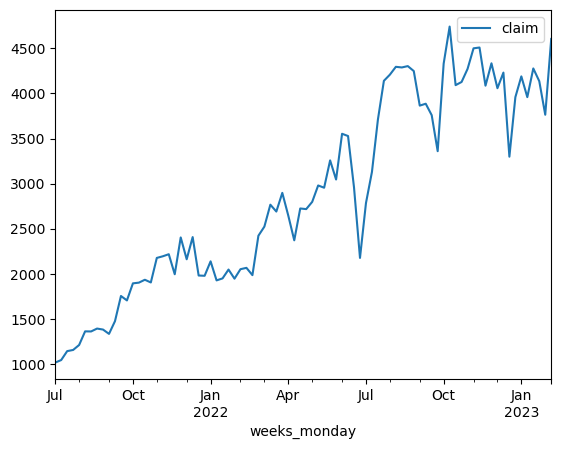

In [9]:
iphone12_df.plot()

In [10]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [11]:
stepwise_fit = auto_arima(iphone12_df['claim'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1195.504, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1194.339, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1192.919, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1195.033, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1191.639, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1192.078, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1194.812, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1194.401, Time=0.03 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.931 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -591.819
Date:                Sat, 11 Mar 2023   AIC                           1191.639
Time:                        14:28:56   BIC                           1201.314
Sample:                    07-05-2021   HQIC                          1195.526
                         - 02-06-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     40.0343     15.120      2.648      0.008      10.400      69.668
ma.L1         -0.3156      0.100     -3.145      0.002      -0.512      -0.119
ma.L2         -0.2663      0.102     -2.605      0.009      -0.467      -0.066
sigma2      9.095e+04   1.08e+04      8.444      0.000    6.98e+04    1.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                17.18
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               4.92   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA(P, D, Q)
### P = order of AR Model
### D = order of differencing to get stationary series
### Q = order of MA Model

In [17]:
from statsmodels.tsa.arima.model import ARIMA

In [18]:
print(iphone12_df.shape)

(84, 1)


In [19]:
train = iphone12_df.iloc[:-20]
test = iphone12_df.iloc[-20:]
print(train.shape, test.shape)

(64, 1) (20, 1)


In [35]:
model = ARIMA(train['claim'], order=(0,1,2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  claim   No. Observations:                   64
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -437.647
Date:                Sat, 11 Mar 2023   AIC                            881.294
Time:                        14:44:32   BIC                            887.723
Sample:                    07-05-2021   HQIC                           883.822
                         - 09-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0275      0.081      0.339      0.734      -0.132       0.187
ma.L2          0.0767      0.091      0.846      0.397      -0.101       0.254
sigma2       6.33e+04   9529.973      6.643      0.000    4.46e+04     8.2e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 6.45
Prob(Q):                              0.77   Prob(JB):                         0.04
Heteroskedasticity (H):               5.47   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
start= len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ='levels')
pred.index=iphone12_df.index[start:end+1]
print(pred)

weeks_monday
2022-09-26    3759.022153
2022-10-03    3751.455388
2022-10-10    3751.455388
2022-10-17    3751.455388
2022-10-24    3751.455388
2022-10-31    3751.455388
2022-11-07    3751.455388
2022-11-14    3751.455388
2022-11-21    3751.455388
2022-11-28    3751.455388
2022-12-05    3751.455388
2022-12-12    3751.455388
2022-12-19    3751.455388
2022-12-26    3751.455388
2023-01-02    3751.455388
2023-01-09    3751.455388
2023-01-16    3751.455388
2023-01-23    3751.455388
2023-01-30    3751.455388
2023-02-06    3751.455388
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='weeks_monday'>

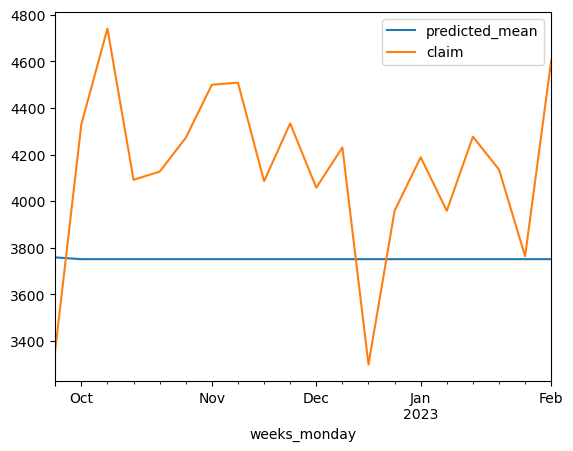

In [37]:
pred.plot(legend=True)
test['claim'].plot(legend=True)

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [39]:
rmse = sqrt(mean_squared_error(pred, test['claim']))
print(rmse)

526.4920741318366


In [40]:
test['claim'].mean()

4141.35